In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import aklab.mpls as mpl # https://github.com/queezz/aklab

In [2]:
%run -n ../tmap7.py

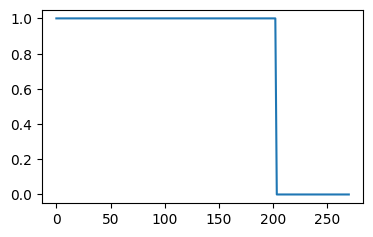

In [3]:
#mpl.font_setup(size=14)
mpl.figprep(width=300)
n = 200
t = np.linspace(0,270,n)
pressure = np.linspace(1,1,n)
pressure[150:] = 0
plt.plot(t,pressure)

In [4]:
%run -n ../tmap7.py
piranipath = os.path.abspath('../pirani.dat')
writePirani((t,pressure), piranipath)

<Figure size 432x288 with 0 Axes>

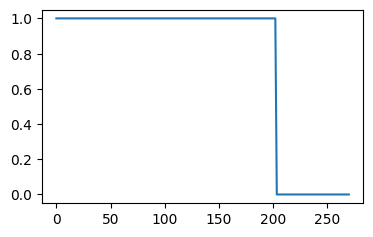

In [5]:
mpl.figprep(width=300)
p = pd.read_csv(os.path.abspath('../pirani.dat'),names=['time','p'])
plt.plot(p['time'],p['p'])

# Check TMAP7 class

run finished


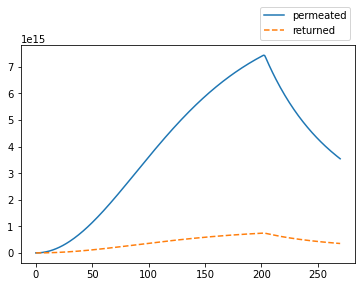

In [6]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
parameters = [1.e16,1e-31,1e-30,0.1,'../template.inp']
t7.prep_parameters(*parameters)
#t7.write_t7_instructions()
t7.run()
t7.plot()

# Loop

In [7]:
from time import sleep

In [22]:
%run -n ../tmap7.py

t7 = TmapTask(basepath='../')
js = []
kus = [1e-31,1e-30,2e-30,5e-30,1e-29]
for ku in kus:
    parameters = [1.e17,ku,1e-30,0.1,'../template.inp']
    t7.prep_parameters(*parameters)
    t7.run()     
    #t7.plot()
    #print(t7.parameters)
    #print(f'{t7.data[:,2].max():.2e}\t{t7.gamma.max():.2e}')
    js.append(t7.gamma)

js = np.array(js)

run finished
run finished
run finished
run finished
run finished


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, '$k_d=10^{-30}$')

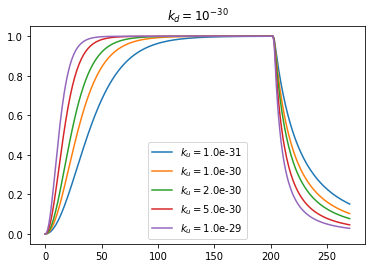

In [31]:
[plt.plot(t7.t,js[i]/js[i].max(),label=f'$k_u=${ku:.1e}') for i,ku in enumerate(kus)]
plt.legend()
plt.title('$k_d=10^{-30}$')